In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

# Array configuration

Text(0.5,1,u'Antenna Positions')

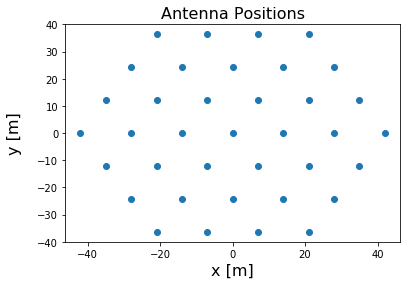

In [2]:
arr_pos_file = '/Users/JBurba/hera_things/brownscripts/jtb/bayes/hera-37_ant_pos.npy'
arr_pos = np.load(arr_pos_file)
scatter(arr_pos[:,0], arr_pos[:,1], marker='o')
xlabel('x [m]', size=16)
ylabel('y [m]', size=16, labelpad=15)
title('Antenna Positions', size=16)

# Generate uvws from array configuration


Frequency range (MHz): 100.0,150.0
Writing uvw_data/uvws_100-150MHz_1.0MHz.npy ...



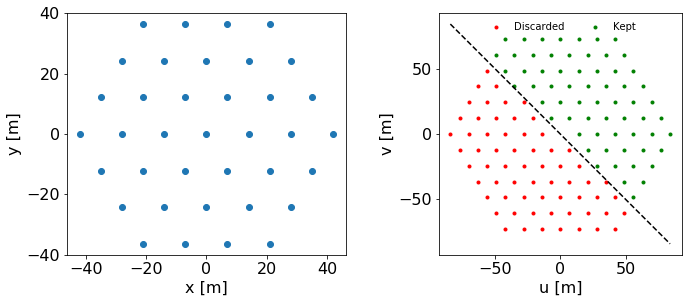

In [3]:
freq_str = '100-150'
freq_res_str = '1.0'
%run uv_from_blns.py --positions=$arr_pos_file --freq=$freq_str --freq_res=$freq_res_str --snapshot --plot --write
uvw_path = '/Users/JBurba/hera_things/brownscripts/jtb/bayes/uvw_data/'
uvw_file = uvw_path + 'uvws_' + freq_str + 'MHz_' + freq_res_str + 'MHz.npy'

# Check analytic solution for presence of wedge

Frequency range: 100.0, 150.0
Frequency resolution: 1.000
Constructing sky...
Loading uvdata...


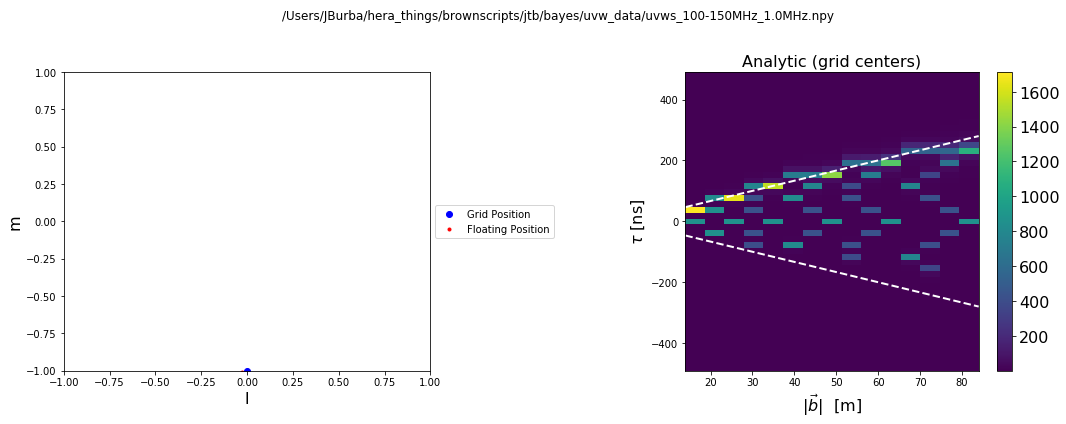

In [4]:
%run check_wedge_analytic_vis.py --uvdata=$uvw_file --horizon_source --grid_pos

Frequency range: 100.0, 150.0
Frequency resolution: 1.000
Constructing sky...
Loading uvdata...


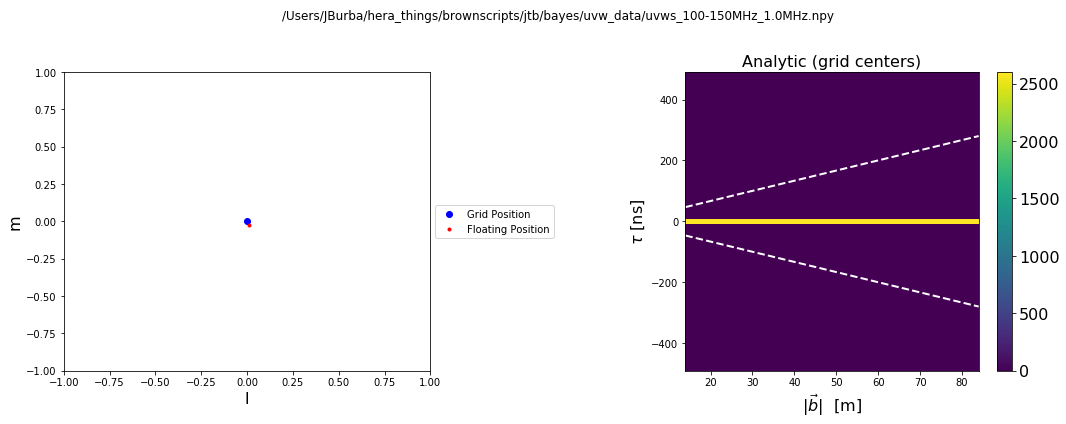

In [5]:
%run check_wedge_analytic_vis.py --uvdata=$uvw_file --zenith_source --grid_pos

Frequency range: 100.0, 150.0
Frequency resolution: 1.000
Constructing sky...
Loading uvdata...


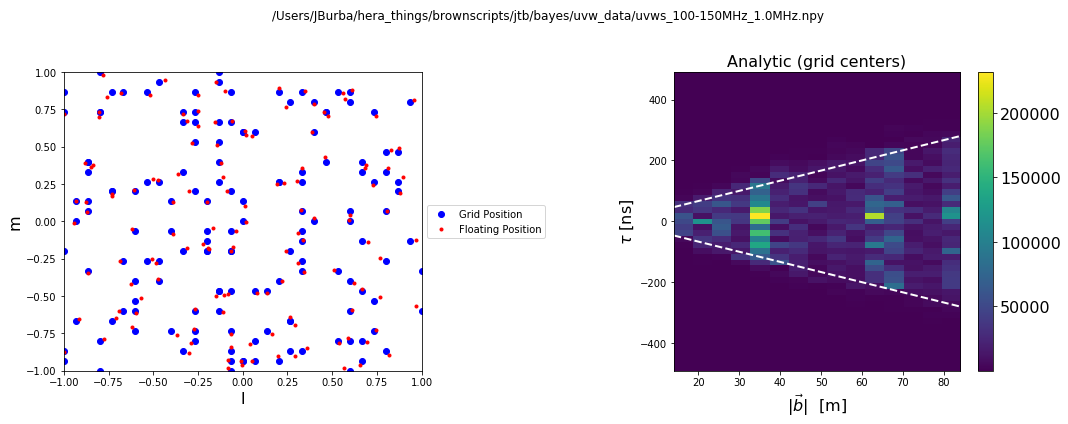

In [6]:
%run check_wedge_analytic_vis.py --uvdata=$uvw_file --grid_pos --nsources=150

## Look at FTd visibilities for various baseline lengths

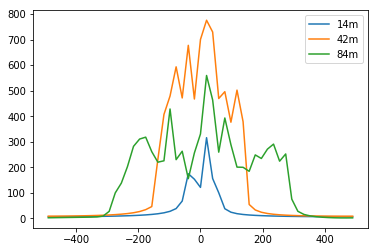

In [7]:
# get baseline lengths in meters
blns = np.round(np.sqrt(us[0]**2 + vs[0]**2)*3.e8/(freqs[0]*1.e6), decimals=8)

# get visibilities for a 14m baseline
inds_14m = np.where(blns == 14.)[0]
taus_14m = np.fft.fftshift(np.fft.fft(Vs_analytic[:, inds_14m[0]]))

# get visibilities for a 42m baseline
inds_42m = np.where(blns == 42.)[0]
taus_42m = np.fft.fftshift(np.fft.fft(Vs_analytic[:, inds_42m[0]]))

# get visibilities for a 84m baseline
inds_84m = np.where(blns == 84.)[0]
taus_84m = np.fft.fftshift(np.fft.fft(Vs_analytic[:, inds_84m[0]]))

# Plot delays for various baselines
plot(ft_freqs, np.abs(taus_14m), label='14m')
plot(ft_freqs, np.abs(taus_42m), label='42m')
plot(ft_freqs, np.abs(taus_84m), label='84m')
legend(loc='best')

# scatter(us, vs, c='k')
# scatter(us[:, inds_14m], vs[:, inds_14m], c='r')
# scatter(us[:, inds_42m], vs[:, inds_42m], c='b')
# scatter(us[:, inds_84m], vs[:, inds_84m], c='y')

# TO DO

1. Look at comparison of delay transform power spectra for grid centers and floating point locations
   Calculate (grid_pos - true_pos)/true_pos  i.e. fractional difference
2. Look at two different sky resolutions (same FOV but double pixel count)

Maximum likelihood (?) solution may be more likely to spread source flux among neighboring pixels (could use HealPy to achieve this effect of generating sources at four pixel centers with weighted fluxes)

        The residuals might be better minimized by a different flux distribution other than just moving a source to 
        the nearest pixel center

Comparison threshold of $10^{-10}$ (since we're squaring visibilities)